In [1]:
%run 'init.py'

### Basic RNNs with Tensorflow

Vectorization: output of layer of recurrent neurons for a mini-batch.

$$ Y_{(t)} = \phi(X_{(t)}.W_x + Y_{(t-1)}.W_y + b) = \phi(\begin{bmatrix} X_{(t)} & Y_{(t-1)} \end{bmatrix}.W + b) \space\space with \space\space W = \begin{bmatrix} W_x \\ W_y \end{bmatrix} $$

- $Y_{(t)}$ is $m \times n_{neurons}$ matrix containing layer's outputs at time step $t$ for each instance in the mini-batch
- $X_{(t)}$ is $m \times n_{inputs}$ matrix containing the inputs for all instances
- $W_x$ is $n_{inputs} \times n_{neurons}$ matrix containing connection weights for the **inputs** of the current time step
- $W_y$ is $n_{neurons} \times n_{n_neurons}$ matrix containing the connection weights for the **outputs** of the previous time step
- $W_x$ and $W_y$ are often concatenated into a single weight matrix $W$ of shape $(n_{inputs} + n_{neurons}) \times n_{neurons}$
- $b$ is a vector of size $n_{neurons}$ containing each neuron's bias term.

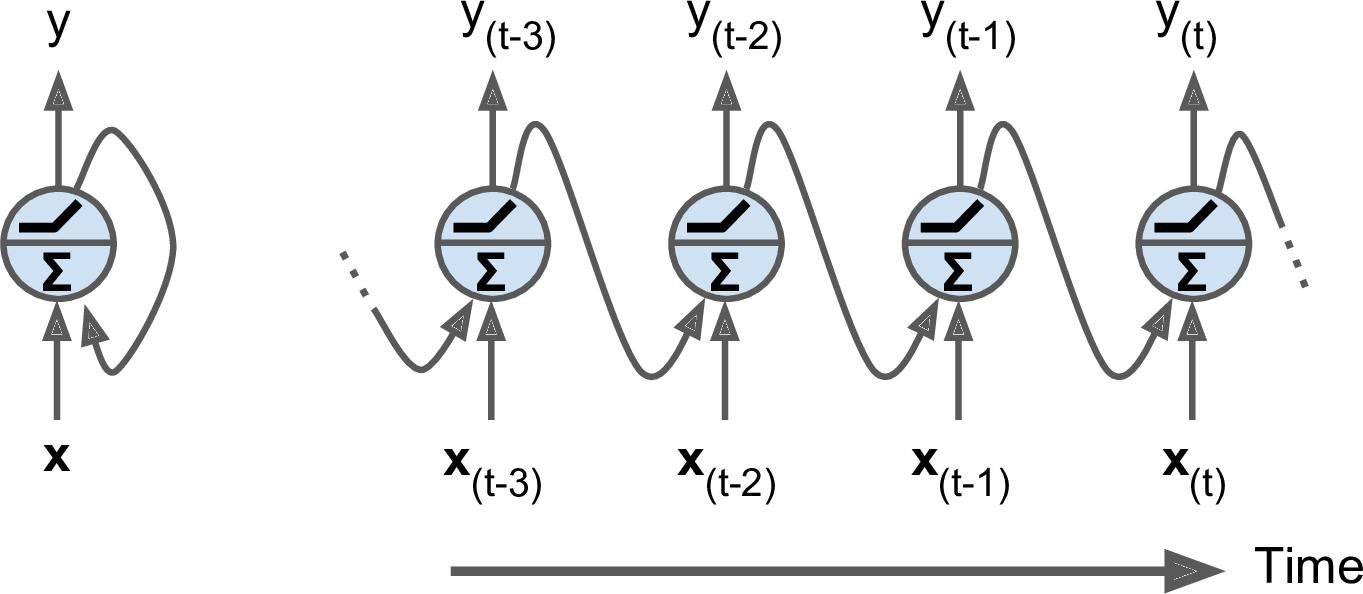

In [2]:
show_image('./images/img2739.jpg')

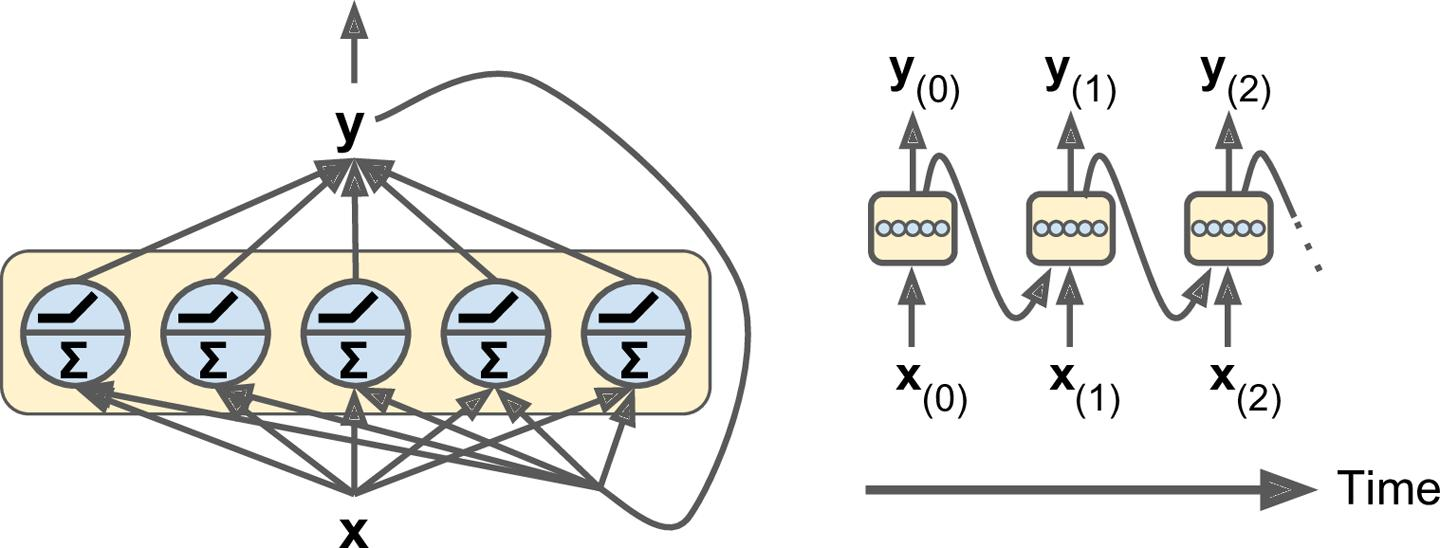

In [3]:
show_image('./images/img2740.jpg')

In [4]:
# We're going to implement a very basic RNN with two time steps with input vectors of size 3
n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons], dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32))
b = tf.Variable(tf.zeros(shape=[1, n_neurons], dtype=tf.float32))

# This network is different from a regular feedforward neural networks:
# - Note that weights and biases are shared between both layers.
# - We feed inputs at each layer and we get outputs from each layer.
Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(X1, Wx) + tf.matmul(Y0, Wy) + b)

# Our mini-batches, each batch has four instances
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

In [5]:
print(Y0_val)

[[ 0.85068524  0.08288819 -0.61026794 -0.60006386 -0.99993491]
 [ 0.27940908 -0.31706986  0.98410392 -0.93364662 -1.        ]
 [-0.59446645 -0.62905484  0.99996907 -0.9906221  -1.        ]
 [-1.          0.99790299  0.99999791 -0.99761063  0.62750661]]


In [6]:
print(Y1_val)

[[-0.99989605  0.36949161  1.         -0.90979546 -1.        ]
 [-0.62485725  0.50785184  0.64400738  0.63664645 -0.99609703]
 [-0.99628013 -0.83719373  0.99999976  0.02998156 -1.        ]
 [-0.9931047  -0.99880499  0.99999523  0.97765684 -0.50973344]]


### Static Unrolling throught time

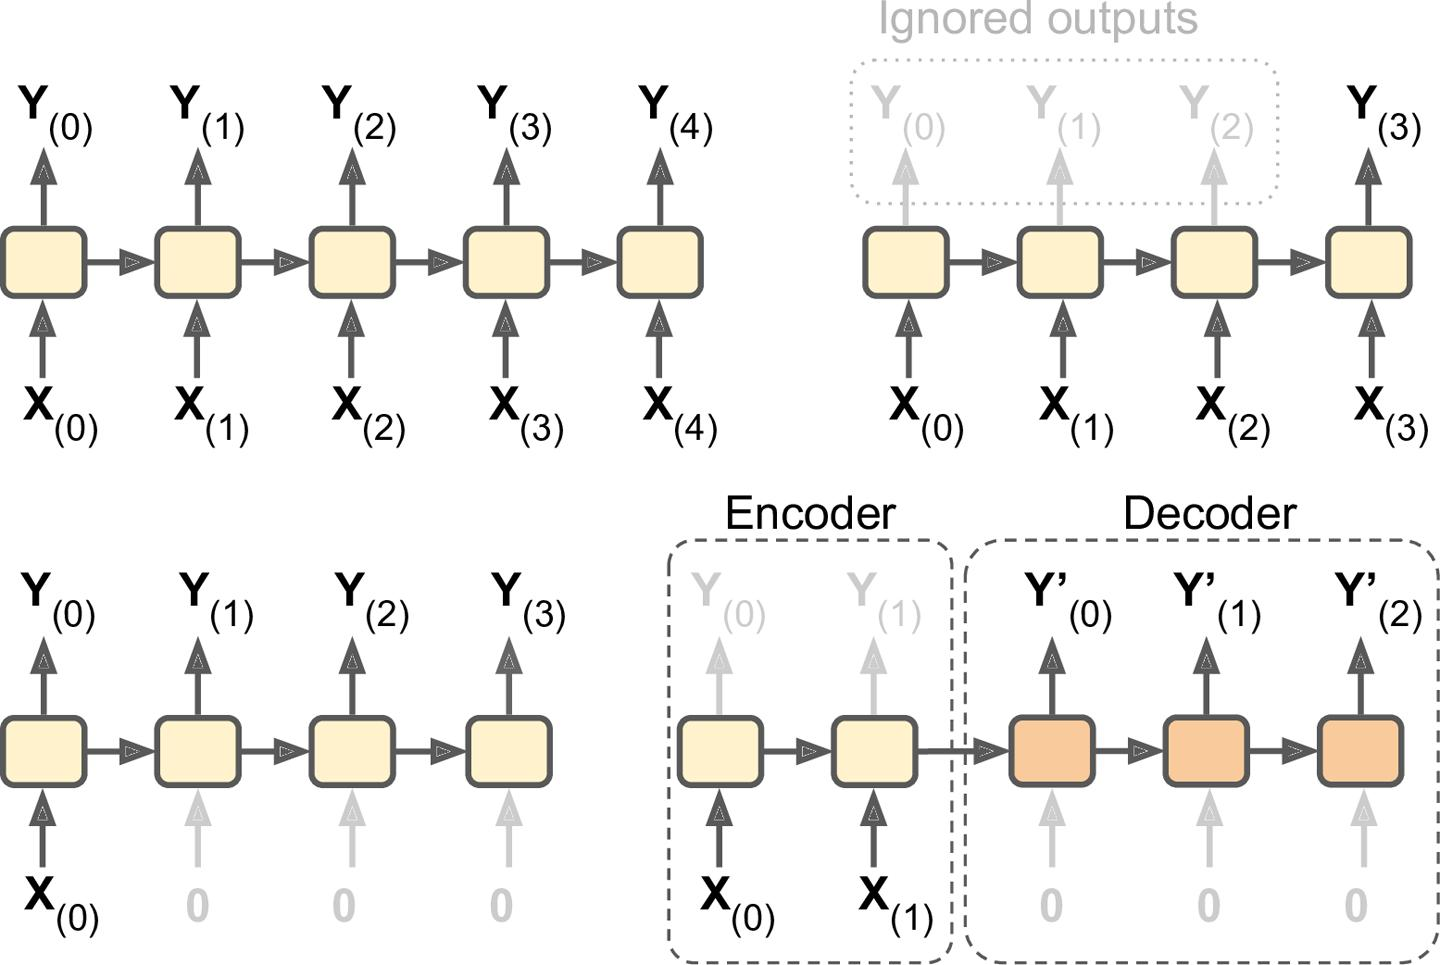

In [7]:
show_image('./images/img2764.jpg')

In [8]:
reset_graph()

In [9]:
X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

# Here we create a basic RNN cell, which is a factory used to create copies of the
# cell to build the unrolled RNN (one for each time step)
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)

# static_rnn function creates an unrolled RNN network by chaining cells.
# static_rnn function receives the cell factory, input tensors and data type
# (used to create initial state of the matrix). static_rnn function calls
# __call__() method of the cell factory once per input, creating two copies 
# of the cell (each containing a layer of five recurrent neurons) - since we
# have two inputs X0 and X1. These copied cells share weights and bias terms,
# static_rnn function then chains them just like we did above.
# static_rnn function returns two objects: the first object is a list containing
# the output tensors for each time step, the second object is the final state
# of the network (which equals to the final output if we use basic cell)
output_seqs, states = tf.nn.static_rnn(cell=basic_cell, inputs=[X0, X1], dtype=tf.float32)

Y0, Y1 = output_seqs

In [10]:
basic_cell

In [11]:
output_seqs

[<tf.Tensor 'rnn/rnn/basic_rnn_cell/Tanh:0' shape=(?, 5) dtype=float32>,
 <tf.Tensor 'rnn/rnn/basic_rnn_cell/Tanh_1:0' shape=(?, 5) dtype=float32>]

In [12]:
states

<tf.Tensor 'rnn/rnn/basic_rnn_cell/Tanh_1:0' shape=(?, 5) dtype=float32>

In [13]:
Y0

<tf.Tensor 'rnn/rnn/basic_rnn_cell/Tanh:0' shape=(?, 5) dtype=float32>

In [14]:
Y1

<tf.Tensor 'rnn/rnn/basic_rnn_cell/Tanh_1:0' shape=(?, 5) dtype=float32>

In [15]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

In [16]:
Y0_val

array([[ 0.30741334, -0.32884315, -0.65428472, -0.93850589,  0.52089024],
       [ 0.99122757, -0.95425421, -0.75180793, -0.99952078,  0.98202348],
       [ 0.99992681, -0.99783254, -0.82473528, -0.9999963 ,  0.99947774],
       [ 0.99677098, -0.68750614,  0.84199691,  0.93039107,  0.8120684 ]], dtype=float32)

In [17]:
Y1_val

array([[ 0.99998885, -0.99976051, -0.06679298, -0.99998039,  0.99982214],
       [-0.65249437, -0.51520866, -0.37968954, -0.59225935, -0.08968385],
       [ 0.99862403, -0.99715197, -0.03308626, -0.99915648,  0.99329019],
       [ 0.99681675, -0.95981938,  0.39660636, -0.83076048,  0.79671967]], dtype=float32)

In [18]:
show_graph(tf.get_default_graph())

#### Packing Sequences

In [19]:
reset_graph()

# If we have a lot of time steps, it'll be inconvenient to define a lot of input placeholders and output tensors.
# Besides, at execution time, we've to feed a lot of input placeholders and manipulate a lot of outputs.
# To resolve the above problem, we can define the input tensor X with the shape of [None, n_steps, n_inputs]
# Then, we extract the list of input sequences for each time step. X_seqs is a list of n_steps tensors of shape
# [None, n_inputs] (the first dimension is the mini-batch size). In order to do that, we need to swap the first two
# dimensions of X so that n_steps becomes the first dimension (using tf.transpose function). After that, we extract
# a list of tensors along the first dimension using tf.unstack function. Finally, we merge all the output tensors
# into a single tensor using tf.stack function. Again, we swap the first two dimensions to get the final output tensor
# of shape [None, n_steps, n_neurons]
n_steps = 2
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
X_seqs = tf.unstack(tf.transpose(X, perm=[1, 0, 2]))
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.nn.static_rnn(basic_cell, X_seqs, dtype=tf.float32)
outputs = tf.transpose(tf.stack(output_seqs), perm=[1, 0, 2])

# A single tensor containing all the mini-batch sequences
X_batch = np.array([
        # t = 0      t = 1 
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

print("X_batch shape:", X_batch.shape)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    X_seqs_eval = sess.run(X_seqs, feed_dict={X: X_batch})
    outputs_val = sess.run(outputs, feed_dict={X: X_batch})

X_batch shape: (4, 2, 3)


In [20]:
print(len(X_seqs))
X_seqs_eval

2


[array([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9.,  0.,  1.]], dtype=float32), array([[ 9.,  8.,  7.],
        [ 0.,  0.,  0.],
        [ 6.,  5.,  4.],
        [ 3.,  2.,  1.]], dtype=float32)]

In [21]:
outputs_val

array([[[-0.45652324, -0.68064123,  0.40938237,  0.63104504, -0.45732826],
        [-0.94288003, -0.99988687,  0.94055814,  0.99999851, -0.9999997 ]],

       [[-0.80015349, -0.99218267,  0.78177971,  0.9971031 , -0.99646091],
        [-0.63711601,  0.11300932,  0.5798437 ,  0.43105593, -0.63716984]],

       [[-0.93605185, -0.99983788,  0.93088669,  0.99998152, -0.99998295],
        [-0.9165386 , -0.99456042,  0.89605415,  0.99987197, -0.99997509]],

       [[ 0.99273688, -0.99819332, -0.55543643,  0.9989031 , -0.9953323 ],
        [-0.02746334, -0.73191994,  0.7827872 ,  0.95256817, -0.97817713]]], dtype=float32)

In [22]:
# We get a single output tensor for all instances, all time steps and all neurons
outputs_val.shape

(4, 2, 5)

In [23]:
np.transpose(outputs_val, axes=[1, 0, 2])

array([[[-0.45652324, -0.68064123,  0.40938237,  0.63104504, -0.45732826],
        [-0.80015349, -0.99218267,  0.78177971,  0.9971031 , -0.99646091],
        [-0.93605185, -0.99983788,  0.93088669,  0.99998152, -0.99998295],
        [ 0.99273688, -0.99819332, -0.55543643,  0.9989031 , -0.9953323 ]],

       [[-0.94288003, -0.99988687,  0.94055814,  0.99999851, -0.9999997 ],
        [-0.63711601,  0.11300932,  0.5798437 ,  0.43105593, -0.63716984],
        [-0.9165386 , -0.99456042,  0.89605415,  0.99987197, -0.99997509],
        [-0.02746334, -0.73191994,  0.7827872 ,  0.95256817, -0.97817713]]], dtype=float32)

One downside of the above approach is that it builds a graph containing one cell per time step. If there're a lot of time steps, the graph would look ugly. Moreover, with a large graph, we may run out of memory during backpropgation since it must store all tensor values during the forward pass so that it can use them to compute gradients during reverse pass. To solve that problem, we can use `dynamic_rnn` function.

In [24]:
show_graph(tf.get_default_graph())

### Dynamic unrolling through time

In [25]:
reset_graph()

# The dynamic_rnn function uses Tensorflow while_loop operation to run over the cell
# an appropriate number of times. We can set swap_memory to True during backpropagation
# to swap GPU's memory to CPU's memory to avoid out-of-memory errors.
# dynamic_rnn function accepts a single tensor for all inputs at every time step (shape [None, n_steps, n_inputs]),
# and returns a single output tensor of shape [None, n_steps, n_neurons]
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

X_batch = np.array([
        [[0, 1, 2], [9, 8, 7]], 
        [[3, 4, 5], [0, 0, 0]], 
        [[6, 7, 8], [6, 5, 4]],
        [[9, 0, 1], [3, 2, 1]],
    ])

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    outputs_val = sess.run(outputs, feed_dict={X: X_batch})

In [26]:
outputs_val

array([[[-0.0948875 , -0.78635412, -0.75976855,  0.81456447, -0.86596668],
        [-0.99999809, -0.99989897, -0.99999422,  0.99959809, -0.4085584 ]],

       [[-0.98823678, -0.99379838, -0.99848306,  0.99407357, -0.9553898 ],
        [ 0.21658944, -0.20340651,  0.02591269,  0.44528607, -0.40116802]],

       [[-0.99991536, -0.99983823, -0.99999166,  0.99982721, -0.98561245],
        [-0.99981058, -0.99268609, -0.99952865,  0.99385983, -0.25559649]],

       [[-0.99883717,  0.84198505, -0.97267133, -0.86984301,  0.99912703],
        [-0.97511095, -0.34840977, -0.92128128,  0.39821982,  0.27953893]]], dtype=float32)

In [27]:
show_graph(tf.get_default_graph())

### Handling variable length input sequences

In [28]:
reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)

# We can use variable length rather than fixed length for the input sequences by setting the sequence_length
# parameter of the dynamic_rnn function. It's a 1D tensor (vector) containing the length of the input sequence
# for each instance.
seq_length = tf.placeholder(tf.int32, [None])
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32, sequence_length=seq_length)

In [29]:
# The second input sequence contains only one input instead of 2.
# It must be padded with a zero vector in order to fit in the input tensor X
X_batch = np.array([
        # step 0     step 1
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2 (padded with zero vectors)
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

seq_length_batch = np.array([2, 1, 2, 2])

In [30]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: X_batch, seq_length: seq_length_batch})

In [31]:
# The RNN outputs zero vectors for every time step past the input sequence length
# Look at the second instance's output for the second time step (t = 1)
# In this case output at the time step (t = 0) will be the final state of the
# second instance's output.
outputs_val

array([[[ 0.73155707,  0.34835717,  0.50581998, -0.22882833, -0.44022718],
        [-0.61832315,  0.99999994,  0.86584806,  0.97933769,  0.9902246 ]],

       [[ 0.8438704 ,  0.99697548,  0.84789461,  0.4303219 ,  0.09275495],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]],

       [[ 0.91159219,  0.99999052,  0.95954454,  0.81892216,  0.57740247],
        [-0.77545464,  0.99987745,  0.97847283,  0.73172009,  0.888776  ]],

       [[-0.99952269,  0.99977839,  0.59744656,  0.99309695,  0.99847412],
        [-0.62120003,  0.54000849,  0.96938425,  0.19893228,  0.1944804 ]]], dtype=float32)

In [32]:
# The states tensor contains the final state of each cell (excluding the zero vectors)
states_val

array([[-0.61832315,  0.99999994,  0.86584806,  0.97933769,  0.9902246 ],
       [ 0.8438704 ,  0.99697548,  0.84789461,  0.4303219 ,  0.09275495],
       [-0.77545464,  0.99987745,  0.97847283,  0.73172009,  0.888776  ],
       [-0.62120003,  0.54000849,  0.96938425,  0.19893228,  0.1944804 ]], dtype=float32)

If the output sequences have variable lengths and we know in advance what length each sequence will have, then we can set the sequence_length parameter as above. However, in general this will not be possible (for example, the length of the translated sentence will be different from the length of the input sentence). In this case, a solution is to define a special output called an **end-of-sequence token (EOS token)**. Any output past the EOS should be ignored (we will do this later in this notebook)

### Training a sequence classifier

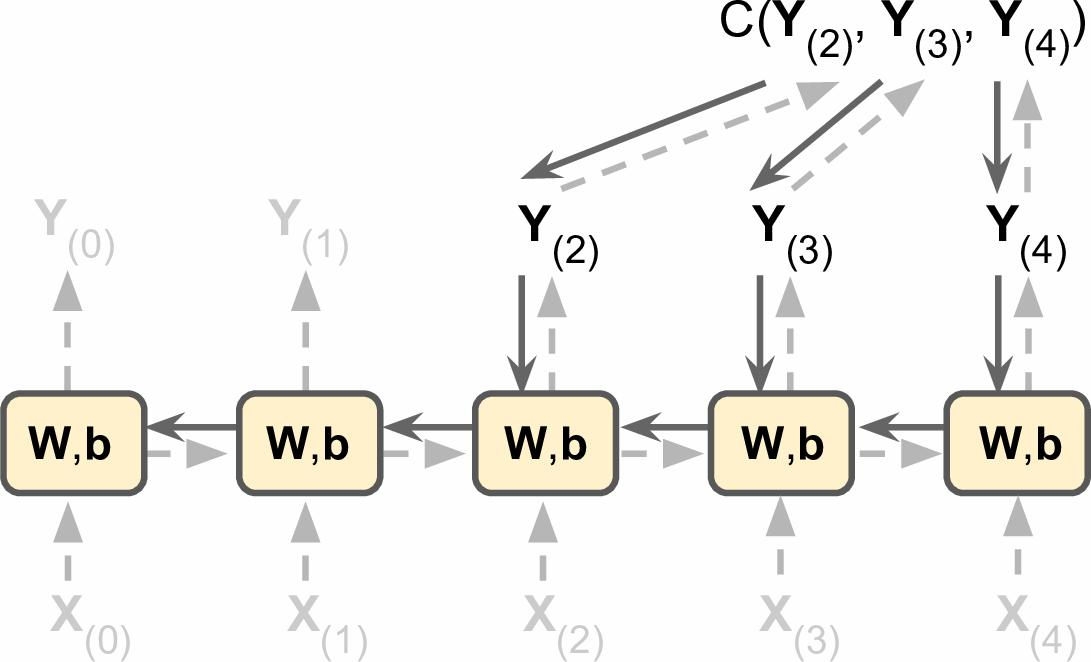

In [33]:
show_image('./images/img2772.jpg')

To train an RNN, we first need to unroll it through time (like what we did in the previous section). Then, we simply use regular backpropagation algorithm like a normal deep neural network. This method is called **backpropagation through time - BPTT**

Like a regular backpropagation, we need to perform two passes through the network: **forward pass** and **reverse (backward) pass**.

In **forward pass**, we go through the *unrolled* network in the forward order to calculate output sequence. This output sequence is then evaluated using a cost function $C(Y_{(t_{min})}, Y_{(t_{min}+1)},...,Y_{(t_{max})})$ where $t_{min}$ and $t_{max}$ are the first and the last output time steps (excluding ignored outputs).

In **backward pass**, the gradients of that cost function are propagated backward through the unrolled network and model parameters are updated using the gradients computed during BPTT. Note that the gradients flow backward through all outputs *used by the cost function*. Moreover, since **W** and **b** are the same for each time step, backpropagation will take care of that for us.

In the following example, we're going to build a simple image classification using MNIST dataset. **Each image represents a sequence of 28 rows of 28 pixels**. Our RNN cell contains 150 recurrent neurons. The network is followed by a fully connected layers (10 neurons) and softmax layer.

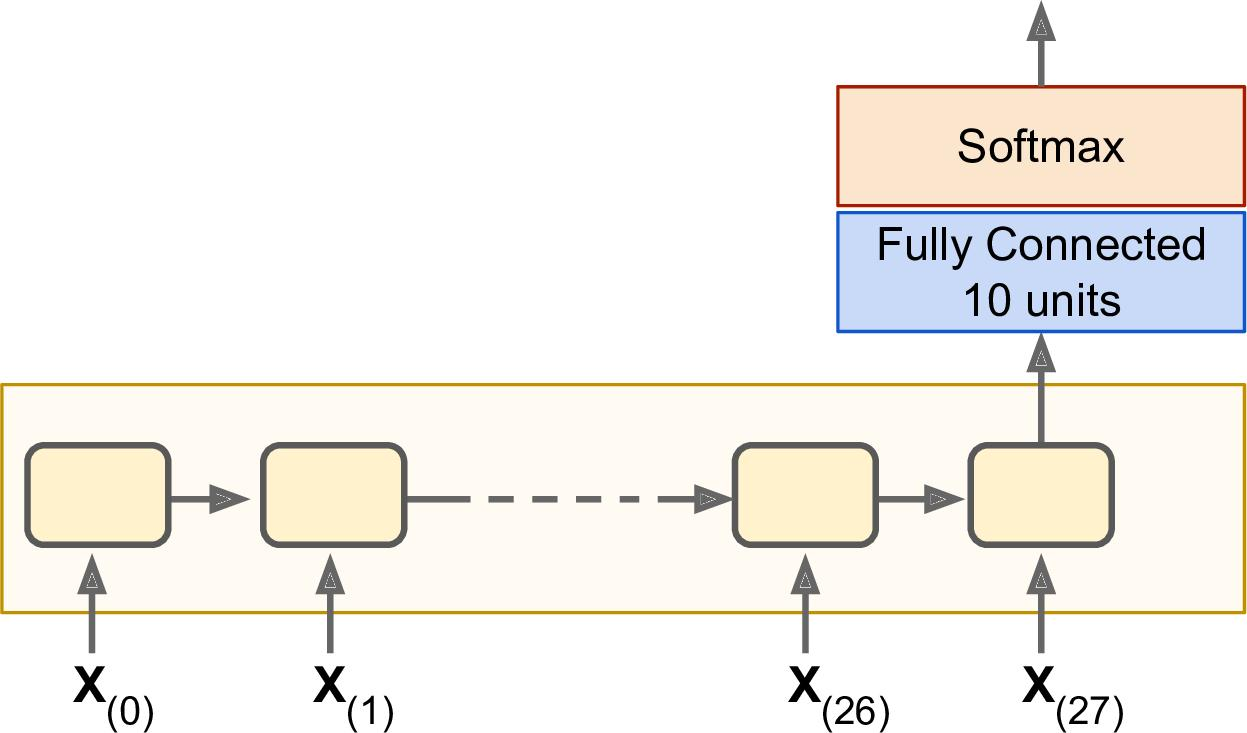

In [34]:
show_image('./images/img2777.jpg')

In [35]:
reset_graph()

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

learning_rate = 1e-4

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

# We need to reshape the input X in order to feed to the RNN network
X_test = mnist.test.images.reshape((-1, n_steps, n_inputs))

y_test = mnist.test.labels

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])


# To use He initialization for RNN, we wrap the construction code
# inside a variable scope
he_init = tf.contrib.layers.variance_scaling_initializer()
with tf.variable_scope("rnn", initializer=he_init):
    basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
    outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

# The output of the last time step will be passed to 
# a fully connected layer of 10 neurons.
logits = tf.layers.dense(states, n_outputs)

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print("Epoch:", epoch, "Train:", acc_train, "Test:", acc_test)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Epoch: 0 Train: 0.8 Test: 0.8241
Epoch: 1 Train: 0.913333 Test: 0.8945
Epoch: 2 Train: 0.886667 Test: 0.9189
Epoch: 3 Train: 0.926667 Test: 0.9311
Epoch: 4 Train: 0.94 Test: 0.9381
Epoch: 5 Train: 0.94 Test: 0.9461
Epoch: 6 Train: 0.953333 Test: 0.9458
Epoch: 7 Train: 0.913333 Test: 0.9479
Epoch: 8 Train: 0.913333 Test: 0.953
Epoch: 9 Train: 0.94 Test: 0.9556


In [36]:
show_graph(tf.get_default_graph())

To improve the above network, we may tune its hyperparameters, use He initialization, train longer, or apply regularization (dropout for example).

### Multi-layer RNN

In [37]:
reset_graph()

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10
n_layers = 3

learning_rate = 1e-3

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

X_test = mnist.test.images.reshape((-1, n_steps, n_inputs))
y_test = mnist.test.labels

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])


# Create a list of basic RNN cells
cells = [tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
            for layer in range(n_layers)]
# RNN cell composed sequentially of multiple simple cells
multi_layers_cell = tf.nn.rnn_cell.MultiRNNCell(cells)
outputs, states = tf.nn.dynamic_rnn(multi_layers_cell, X, dtype=tf.float32)

states_concat = tf.concat(axis=1, values=states)
logits = tf.layers.dense(states_concat, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

n_epochs = 5
batch_size = 150

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print("Epoch:", epoch, "Train:", acc_train, "Test:", acc_test)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Epoch: 0 Train: 0.953333 Test: 0.9536
Epoch: 1 Train: 0.96 Test: 0.9615
Epoch: 2 Train: 0.966667 Test: 0.9711
Epoch: 3 Train: 0.973333 Test: 0.981
Epoch: 4 Train: 0.993333 Test: 0.9792


### Predict time series

One of important applications of RNN is predicting time series such as stock prices, temparature, wave patterns, and weather forecast.

In the following example, we'll illustrate a process of predicting wave patterns. Each training instance is a **randomly selected sequence** of 20 consecutive values from the time series. The target sequence is the same as the input sequence but shifted by one time step into the future. Let's plot something:

In [38]:
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

In [39]:
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))
n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plt.title("A time series", fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sint(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="A training instance")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")
# plt.show()

Text(0.5,0,'Time')

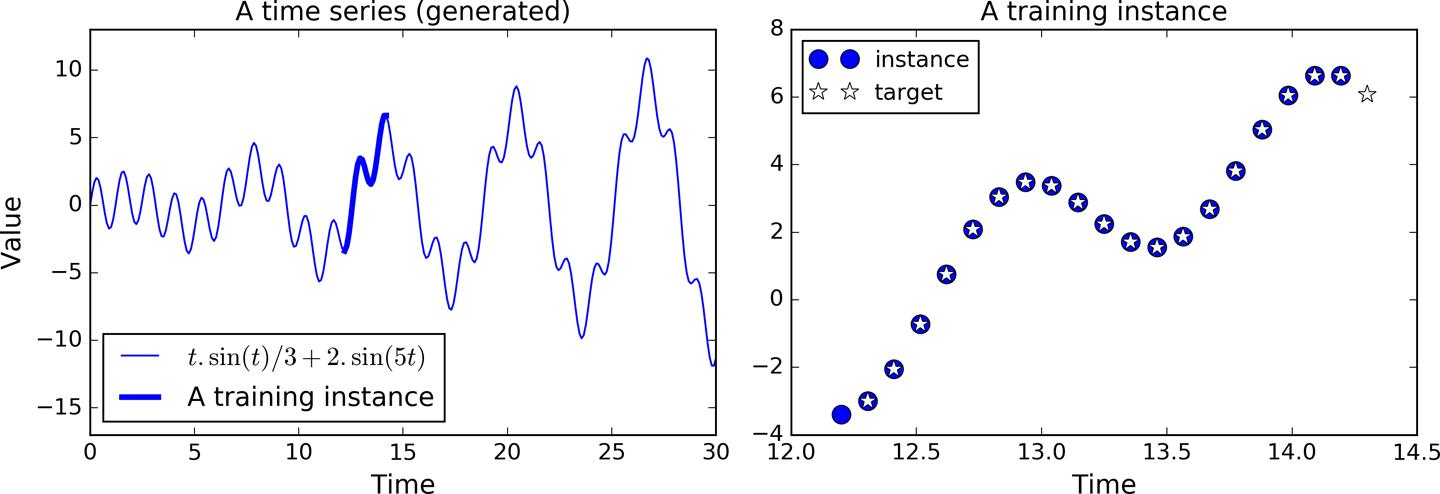

In [40]:
show_image('./images/img2787.jpg')

In [41]:
X_batch, y_batch = next_batch(1, n_steps)

In [42]:
X_batch.shape

(1, 20, 1)

In [43]:
y_batch.shape

(1, 20, 1)

In [44]:
np.c_[X_batch[0], y_batch[0]]

array([[-5.88720833, -4.9589069 ],
       [-4.9589069 , -4.41672693],
       [-4.41672693, -4.29160417],
       [-4.29160417, -4.49643928],
       [-4.49643928, -4.84848023],
       [-4.84848023, -5.1152831 ],
       [-5.1152831 , -5.07298733],
       [-5.07298733, -4.56262503],
       [-4.56262503, -3.53066364],
       [-3.53066364, -2.04384014],
       [-2.04384014, -0.27463835],
       [-0.27463835,  1.53905302],
       [ 1.53905302,  3.15024279],
       [ 3.15024279,  4.36133496],
       [ 4.36133496,  5.07051886],
       [ 5.07051886,  5.29471414],
       [ 5.29471414,  5.16347297],
       [ 5.16347297,  4.88535235],
       [ 4.88535235,  4.69500968],
       [ 4.69500968,  4.79399353]])

Our RNN will contain 100 recurrent neurons and we'll unroll it over 20 time steps (because each training instance is 20 inputs long). Each input contains only one feature value (the value at a given time). The targets are also sequences of 20 inputs, each contains a single value.

In this demo, our instances have only one input feature. It might not be the case for real-life problems. For example, if we're trying to predict stock prices, we would have a lot of input features at each time step such as price, rating, etc.

In [45]:
n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])
cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [46]:
outputs.shape

TensorShape([Dimension(None), Dimension(20), Dimension(100)])

At each time step, we have an output vector of size 100. However, we only want a single output value at each time step. One way to do that it to wrap the cell in an `OutputProjectionWrapper` cell wrapper. The wrapper cell proxies all method calls to an underlying cell, but it also adds some functionality. `OutputProjectionWrapper` adds a fully connected layer of linear neurons (neurons without activation function) on top of each output. All these fully connected layers share the same (trainable) weights and bias terms.

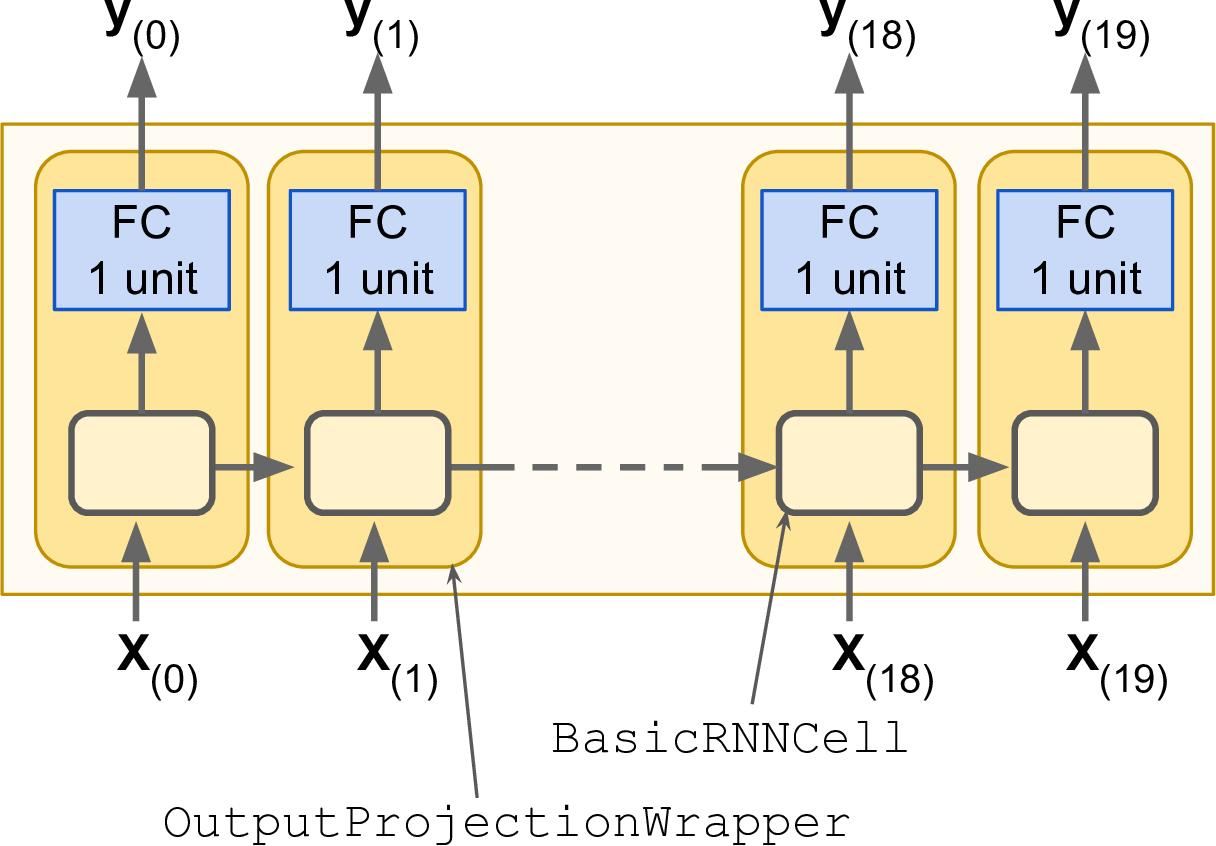

In [47]:
show_image('./images/img2791.jpg')

In [48]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

# Wrapping a regular RNN cell
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)

outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

learning_rate = 1e-3

# For regression task, we're going to use MSE as our cost function
loss = tf.reduce_mean(tf.square(outputs - y))

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

n_iterations = 1500
batch_size = 50
saver = tf.train.Saver()

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    saver.save(sess, './models/time_series/time_series_model')

0 	MSE: 18.9177
100 	MSE: 0.762551
200 	MSE: 0.290907
300 	MSE: 0.149525
400 	MSE: 0.0772763
500 	MSE: 0.0665644
600 	MSE: 0.0636215
700 	MSE: 0.0559812
800 	MSE: 0.0554487
900 	MSE: 0.0529518
1000 	MSE: 0.0534466
1100 	MSE: 0.051972
1200 	MSE: 0.0442769
1300 	MSE: 0.0547834
1400 	MSE: 0.0466028


In [49]:
# Test on new instance
with tf.Session() as sess:
    saver.restore(sess, './models/time_series/time_series_model')
    
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

y_pred

INFO:tensorflow:Restoring parameters from ./models/time_series/time_series_model


array([[[-3.42637658],
        [-2.46367216],
        [-1.15637207],
        [ 0.76617211],
        [ 2.29781222],
        [ 3.12525225],
        [ 3.4899745 ],
        [ 3.33646941],
        [ 2.82800984],
        [ 2.24254656],
        [ 1.71146703],
        [ 1.62021911],
        [ 2.00660276],
        [ 2.79940104],
        [ 3.91245008],
        [ 5.18602514],
        [ 6.16892099],
        [ 6.69519091],
        [ 6.66508675],
        [ 6.10952806]]], dtype=float32)

Let's plot the predictions of the trained model:

In [50]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0, :, 0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")
# plt.show()
plt.clf()

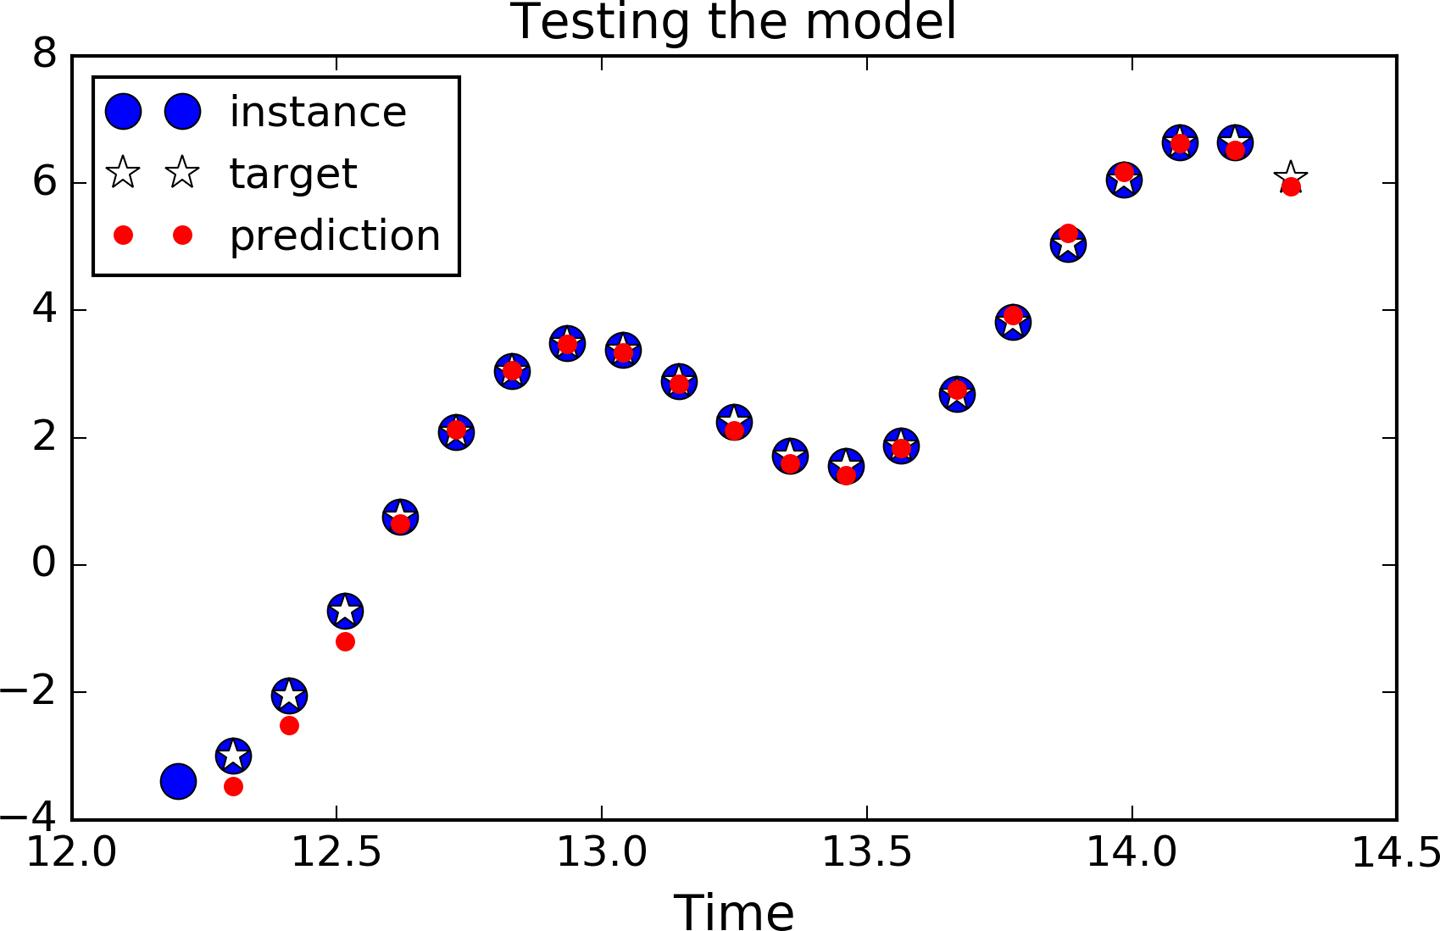

In [51]:
show_image('./images/img2801.jpg')

`OutputProjectionWrapper` is a solution to reduce the dimensionality of the RNN's output sequences down to 1 (or any other sizes) value per time step; however, it's not efficient.

Another way to tackle the above process is reshaping (stacking vertically) RNN outputs from `[batch_size, n_steps, n_neurons]` to `[batch_size * n_steps, n_neurons]`, then applying a single fully connected layer with appropriate output size. The dense layer results in an output tensor of shape `[batch_size * n_steps, n_outputs]`. We can then reshape (unstacking) this tensor to `[batch_size, n_steps, n_outputs]`. These operations are illustrated in the following figure:

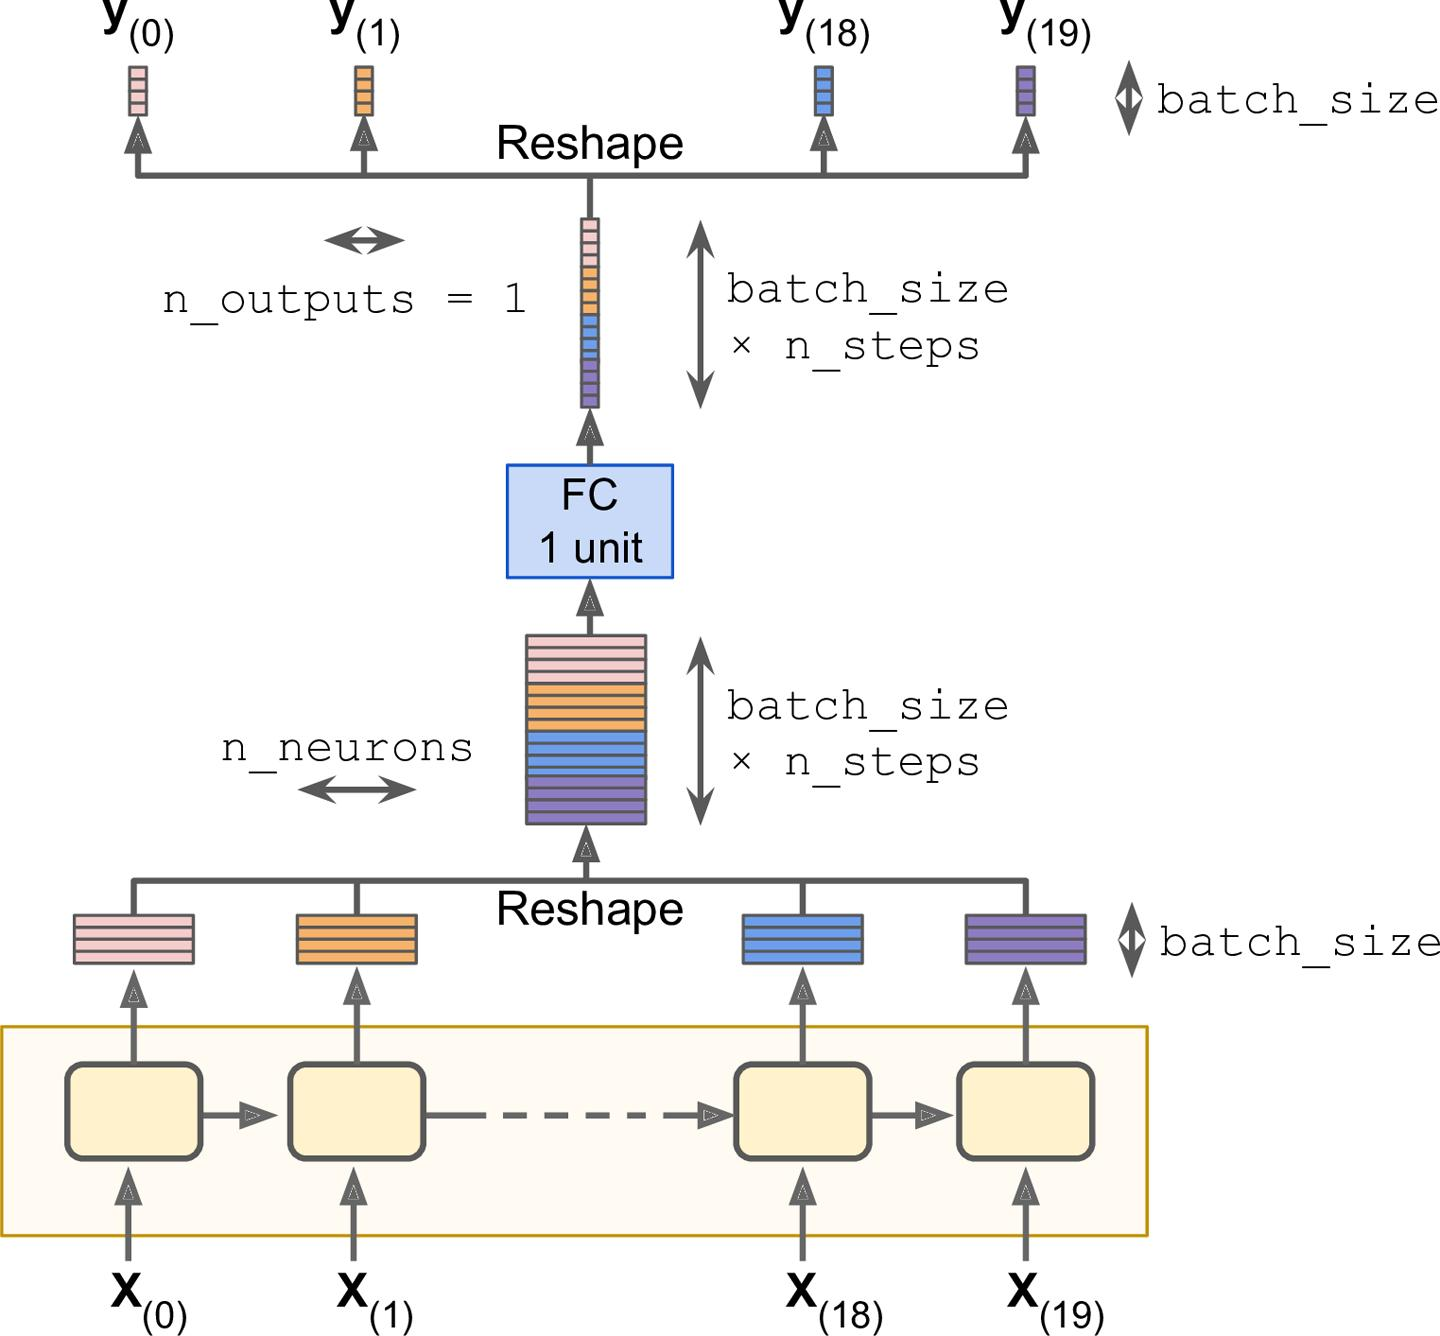

In [52]:
show_image('./images/img2802.jpg')

In [53]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
stacked_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs_dense = tf.layers.dense(stacked_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs_dense, [-1, n_steps, n_outputs])

learning_rate = 1e-3
loss = tf.reduce_mean(tf.square(outputs - y))

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

n_iterations = 1500
batch_size = 50
saver = tf.train.Saver()

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    saver.save(sess, './models/time_series/time_series_model')

0 	MSE: 10.1622
100 	MSE: 0.406083
200 	MSE: 0.116547
300 	MSE: 0.0686967
400 	MSE: 0.0689586
500 	MSE: 0.0625274
600 	MSE: 0.056175
700 	MSE: 0.0507173
800 	MSE: 0.0516515
900 	MSE: 0.0502068
1000 	MSE: 0.0497242
1100 	MSE: 0.0506494
1200 	MSE: 0.0413749
1300 	MSE: 0.0501782
1400 	MSE: 0.0440728


### Creative RNN

We had a model that can predict the future, we can use it to generate some creative sequences.

We can provide the model a seed sequence containing n_steps values, and use the model to predict next value, append predicted value to the sequences, feed the last n_steps values to the model to predict the next value, etc.

In [54]:
with tf.Session() as sess:
    saver.restore(sess, './models/time_series/time_series_model')
    
    sequence = [0.] * n_steps
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./models/time_series/time_series_model


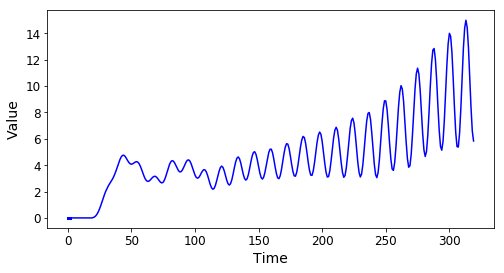

In [55]:
plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(sequence)), sequence, "b-")
plt.plot(t[:n_steps], sequence[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()
plt.clf()

INFO:tensorflow:Restoring parameters from ./models/time_series/time_series_model


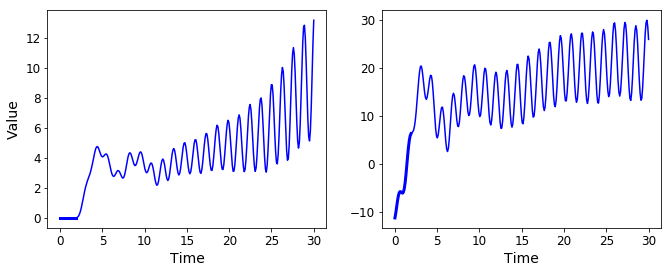

In [56]:
with tf.Session() as sess:
    saver.restore(sess, './models/time_series/time_series_model')

    sequence1 = [0. for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence1[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence1.append(y_pred[0, -1, 0])

    sequence2 = [time_series(i * resolution + t_min + (t_max-t_min/3)) for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence2[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence2.append(y_pred[0, -1, 0])

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(t, sequence1, "b-")
plt.plot(t[:n_steps], sequence1[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.plot(t, sequence2, "b-")
plt.plot(t[:n_steps], sequence2[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.show()

## Deep RNNs